# Proyek Analisis Data: [Air Quality District in Beijing, China]
- **Nama:** [Shafida Afifah Firdausy]
- **Email:** [m279d4kx3233@bangkit.academy]
- **ID Dicoding:** [shafiidaaaa]

## Menentukan Pertanyaan Bisnis

#### **Pertanyaan 1: Bagaimana perkembangan konsentrasi polutan per tahunnya?**<br/>
#### **Pertanyaan 2: Kota manakah dengan polusi udara terburuk?**

In [2]:
!pip install streamlit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import streamlit as st
import datetime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


## Import Semua Packages/Library yang Digunakan

## Data Wrangling

### Gathering Data

In [3]:

aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

changping_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")

dingling_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")

dongsi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")

wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

wanliu_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")

tiantan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")

shunyi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")

nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")

huairou_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")

gucheng_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")

guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")



In [4]:

dfs = {
    "aotizhongxin_df": aotizhongxin_df,
    "changping_df": changping_df,
    "dingling_df": dingling_df,
    "dongsi_df": dongsi_df,
    "guanyuan_df": guanyuan_df,
    "gucheng_df": gucheng_df,
    "huairou_df": huairou_df,
    "nongzhanguan_df": nongzhanguan_df,
    "shunyi_df": shunyi_df,
    "tiantan_df": tiantan_df,
    "wanliu_df": wanliu_df,
    "wanshouxigong_df": wanshouxigong_df,
}

area_list = [
    "aotizhongxin_df",
    "changping_df",
    "dingling_df",
    "dongsi_df",
    "guanyuan_df",
    "gucheng_df",
    "huairou_df",
    "nongzhanguan_df",
    "shunyi_df",
    "tiantan_df",
    "wanliu_df",
    "wanshouxigong_df",
]

### Assessing Data

CEK APAKAH DATA SUDAH BERDITRIBUSI NORMAL

JIKA DATA BERDISTRIBUSI NORMAL MAKA STD < 10 ATAU P-VALUES<0.05
DISINI SEMUA DATA BELUM BERDISTRIBUSI NORMAL

In [5]:

def checkNormality(data):
    for column_name, column_values in data.items():
        if pd.api.types.is_numeric_dtype(column_values):
            sdev = column_values.std()
            print(f"Standard Deviation of {column_name}: {sdev}")
            p_values = stats.shapiro(column_values)
            print(f"With p-values of {column_name}: {p_values}")


KARENA SEMUA DATA BELUM BERDISTRIBUSI NORMAL, NILAI YANG HILANG DALAM DATA AKAN DIISI DENGAN MEDIAN BUKAN MEAN

In [6]:

def fillMissingValues(data):
    filled_data = data.copy()
    for column_name, column_values in filled_data.items():
        if pd.api.types.is_numeric_dtype(column_values):
            column_values.fillna(value=column_values.median(), inplace=True)
            print(
                f"Missing values in {column_name} after: {column_values.isna().sum()}"
            )

    return filled_data


In [7]:
def checkBro(chooseData):
    chooseData.info()
    print(str(chooseData).upper())
    print("Missing values\t:\t", chooseData.isna().sum())
    # print(chooseData.hist())
    checkNormality(chooseData)
    print("\n\n")

for area, df in dfs.items():
    checkBro(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
          NO  YEAR  MONTH  DAY  HOUR  PM2.5  PM10   SO2   NO2     CO

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


          NO  YEAR  MONTH  DAY  HOUR  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   28.0  47.0   4.0  14.0  300.0   NAN   
35060  35061  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   WD  WSPM    STATION  
0      

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


With p-values of DEWP: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of RAIN: 0.7528993068240751
With p-values of RAIN: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of WSPM: 1.3098083299251673
With p-values of WSPM: ShapiroResult(statistic=nan, pvalue=1.0)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  fl

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 72.26772326105232
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 79.5416845611298
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 15.519259061819355
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 26.383882215560565
With p-values of NO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of CO: 903.3062200927128
With p-values of CO: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of O3: 53.76442400593234
With p-values of O3: ShapiroResult(

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
          NO  YEAR  MONTH  DAY  HOUR  PM2.5  PM10   SO2   NO2     CO

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Missing values	:	 No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64
Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.1772134318198135
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 82.79644460750218
With p-value

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Standard Deviation of month: 3.4487523600478474
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431565
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 71.22491632107513
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 83.28957818781265
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 18.89691157946371
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 26.489531011447063
With p-values of NO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of CO: 898.7382414443408
With p-values of CO: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of O3: 54.60574619635377
With p-values of O3: ShapiroResult(s

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
          NO  YEAR  MONTH  DAY  HOUR  PM2.5  PM10  SO2   NO2     CO 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



Standard Deviation of TEMP: 11.385156396168611
With p-values of TEMP: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PRES: 10.570928089396007
With p-values of PRES: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of DEWP: 13.70413902897918
With p-values of DEWP: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of RAIN: 0.7969806967664594
With p-values of RAIN: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of WSPM: 1.206354759826012
With p-values of WSPM: ShapiroResult(statistic=nan, pvalue=1.0)





### Cleaning Data

HASIL DARI DATA YANG SUDAH DIISI MISSING VALUESNYA AKAN DISIMPAN DALAM VARIABEL BARU

In [8]:

dfs_after = {}

for area, df in dfs.items():
    df_after = fillMissingValues(df)
    dfs_after[area + '_after'] = df_after


Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0
Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM

CEK APAKAH DATA ADA YANG TERDUPLIKASI, DI DALAM DATA INI TIDAK ADA YANG TERDUPLIKASI

In [9]:

for area, df_after in dfs_after.items():
    print(f"{area} Duplicates: {df_after.duplicated().sum()}")

print("THERE ARE NO DUPLICATES YEESSS")


aotizhongxin_df_after Duplicates: 0
changping_df_after Duplicates: 0
dingling_df_after Duplicates: 0
dongsi_df_after Duplicates: 0
guanyuan_df_after Duplicates: 0
gucheng_df_after Duplicates: 0
huairou_df_after Duplicates: 0
nongzhanguan_df_after Duplicates: 0
shunyi_df_after Duplicates: 0
tiantan_df_after Duplicates: 0
wanliu_df_after Duplicates: 0
wanshouxigong_df_after Duplicates: 0
THERE ARE NO DUPLICATES YEESSS


SELANJUTNYA AKNA DI CEK UNTUK DATA YANG MENGANDUNG OUTLIERS, LALU DATA DIGANTI DENGAN MEDIAN

In [10]:

def imputationOutliers(chooseData):
    for column_name, column_values in chooseData.items():
        if pd.api.types.is_numeric_dtype(column_values):
            q1 = np.percentile(column_values, 25)
            q3 = np.percentile(column_values, 75)
            iqr = q3 - q1
            upperBound = q3 + 3 * iqr
            lowerBound = q1 - 3 * iqr

            if iqr > 0:
                outliers = column_values[
                    (column_values < lowerBound) | (column_values > upperBound)
                ]
                print(
                    column_name,
                    "IQR   \t:",
                    iqr,
                    "                  \t=====>>>>>",
                    column_name,
                    "outliers : ",
                    outliers.count(),
                )

                chooseData[column_name] = np.where(
                    column_values < lowerBound, lowerBound, column_values
                )
                chooseData[column_name] = np.where(
                    column_values > upperBound, upperBound, column_values
                )

            else:
                pass
    print("\n")



In [11]:
dfs_outlier_imputed = {}

for area, df in dfs_after.items():
    print(area)
    imputationOutliers(df)
    dfs_outlier_imputed[area] = df


aotizhongxin_df_after
No IQR   	: 17531.5                   	=====>>>>> No outliers :  0
year IQR   	: 2.0                   	=====>>>>> year outliers :  0
month IQR   	: 6.0                   	=====>>>>> month outliers :  0
day IQR   	: 15.0                   	=====>>>>> day outliers :  0
hour IQR   	: 11.5                   	=====>>>>> hour outliers :  0
PM2.5 IQR   	: 89.0                   	=====>>>>> PM2.5 outliers :  330
PM10 IQR   	: 114.0                   	=====>>>>> PM10 outliers :  201
SO2 IQR   	: 18.0                   	=====>>>>> SO2 outliers :  1138
NO2 IQR   	: 50.0                   	=====>>>>> NO2 outliers :  19
CO IQR   	: 1000.0                   	=====>>>>> CO outliers :  969
O3 IQR   	: 71.0                   	=====>>>>> O3 outliers :  59
TEMP IQR   	: 20.2                   	=====>>>>> TEMP outliers :  0
PRES IQR   	: 16.800000000000068                   	=====>>>>> PRES outliers :  0
DEWP IQR   	: 23.7                   	=====>>>>> DEWP outliers :  0
WSPM IQR   

DATA YANG BUKAN INTEGER AKAN MISSING VALUESNYA AKAN DIISI DENGAN MODUS, LALU DISIMPAN DALAM DICTIONARY BARU YAITU dfs_cleaned YANG BERARTI DATA YANG TELAH MELALU PROSES CLEANING

In [12]:

dfs_cleaned = {}
for area, df in dfs_outlier_imputed.items():
    modeWindDirection = df["wd"].mode()[0]
    df["wd"].fillna(modeWindDirection, inplace=True)
    print(area, " Missing Values \t: ", df["wd"].isna().sum())
    dfs_cleaned[area] = df


aotizhongxin_df_after  Missing Values 	:  0
changping_df_after  Missing Values 	:  0
dingling_df_after  Missing Values 	:  0
dongsi_df_after  Missing Values 	:  0
guanyuan_df_after  Missing Values 	:  0
gucheng_df_after  Missing Values 	:  0
huairou_df_after  Missing Values 	:  0
nongzhanguan_df_after  Missing Values 	:  0
shunyi_df_after  Missing Values 	:  0
tiantan_df_after  Missing Values 	:  0
wanliu_df_after  Missing Values 	:  0
wanshouxigong_df_after  Missing Values 	:  0


## Exploratory Data Analysis (EDA)

In [29]:
dfs_cleaned['aotizhongxin_df_after'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  float64
 1   year     35064 non-null  float64
 2   month    35064 non-null  float64
 3   day      35064 non-null  float64
 4   hour     35064 non-null  float64
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(16), object(2)
memory usage: 4.8+ MB


In [28]:
dfs_cleaned['aotizhongxin_df_after'].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,81.312095,109.014579,16.210035,59.109168,1201.860027,55.596973,13.585130,1011.846665,3.123449,0.067383,1.703870
std,10122.249256,1.177213,3.448752,8.800218,6.922285,77.347172,91.287404,18.664410,36.519657,1014.243953,56.315770,11.395866,10.401084,13.685001,0.909798,1.184564
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,379.000000,495.000000,75.000000,231.000000,4500.000000,293.000000,40.500000,1042.000000,28.500000,72.500000,6.100000


SEKARANG SATUKAN SEMUA DATA

In [30]:
all_data = pd.concat(dfs_cleaned.values())

SETELAH ITU AKAN DIBUAT FUNGSI UNTUK MENGHITUNG AQI(AIR QUALITY INDEX)

<br/>STANDAR DARI AQI ITU SENDIRI DISIMPAN DALAM TABEL aqiTable

RUMUS PERHITUNGAN AQI
adalah
                   

                   I = (Ia - Ib)(Xx-Xb)/(Xa-Xb) + Ib

                   I = ISPU terhitung

                   Ia = ISPU batas atas

                   Ib = ISPU batas bawah

                   Xa = Konsentrasi ambien batas atas (µg/m3)

                   Xb = Konsentrasi ambien batas bawah (µg/m3)

                   Xx = Konsentrasi ambien nyata hasil pengukuran

In [14]:
def calculateAqi(pollutant, averageDaily):
    global aqiTable
    aqiTable = {
        'PM2.5': {
            50: (0, 12),
            100: (12.1, 35.4),
            150: (35.5, 55.4),
            200: (55.5, 150.4),
            300: (150.5, 250.4),
            400: (250.5, 350.4),
            500: (350.5, 500.4)
        },
        'PM10': {
            50: (0, 50),
            100: (51, 100),
            250: (101, 250),
            350: (251, 350),
            420: (351, 420),
            500: (421, 500)
        },
        'SO2': {
            50: (0, 35),
            100: (36, 75),
            150: (76, 185),
            200: (186, 304),
            300: (305, 604),
            400: (605, 804),
            500: (805, 1004)
        },
        'CO': {
            50: (0, 4.4),
            100: (4.5, 9.4),
            150: (9.5, 12.4),
            200: (12.5, 15.4),
            300: (15.5, 30.4),
            400: (30.5, 40.4),
            500: (40.5, 50.4)
        },
        'O3': {
            50: (0, 54),
            100: (55, 70),
            150: (71, 85),
            200: (86, 105),
            300: (106, 200),
            400: (201, 504),
            500: (505, 604)
        },
        'NO2': {
            50: (0, 53),
            100: (54, 100),
            150: (101, 360),
            200: (361, 649),
            300: (650, 1249),
            400: (1250, 1649),
            500: (1650, 2049)
        },
    }

    if pollutant in aqiTable:
        for aqiValue, (low, high) in aqiTable[pollutant].items():
            if low <= averageDaily <= high:
                result = ((averageDaily - low) / (high - low)) * (aqiValue - 0) + 0
                return result

        maxAqi = max(aqiTable[pollutant].keys())
        if averageDaily > high:
            scaled_result = maxAqi + ((averageDaily - high) / (averageDaily - high)) * (500 - maxAqi)
            return scaled_result
        else:
            return 500
    else:
        print("Input pollutant between PM2.5, PM10, CO, SO, NO2, O3")
        return None

LALU SETELAH DIHITUNG aqi, MAKA KITA MASUKKAN KE DALAM KATEGORI YANG SESUAI DENGAN STANDAR

In [15]:

def aqiCategory(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 199:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 299:
        return "Unhealthy"
    elif aqi <= 399:
        return "Very Unhealthy"
    else:
        return "Hazardous"

SEKARANG KITA KELOMPOKKAN DATA BERDASARKAN TAHUN DAN RATA RATA PER POLUTAN

In [32]:
group_byyear = all_data.groupby(by="year").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2":"mean",
    "NO2":"mean",
    "CO":"mean",
    "O3":"mean",
})

SEKARANG KITA KELOMPOKKAN DATA BERDASARKAN TAHUN DAN NILAI AQI

In [33]:
group_byaqi = all_data.groupby(by="year").agg({
    "PM2.5": lambda x: calculateAqi("PM2.5", x.mean()),
    "PM10": lambda x: calculateAqi("PM10",x.mean()),
    "SO2": lambda x: calculateAqi("SO2",x.mean()),
    "NO2": lambda x: calculateAqi("NO2",x.mean()),
    "CO": lambda x: calculateAqi("CO",x.mean()),
    "O3": lambda x: calculateAqi("O3",x.mean())
})

SELANJUTNYA KITA AKAN MEMBUAT FUNGSI UNTUK MEMUDAHKAN PERHITUNGAN SUM DAILY, AVERAGE DAILY, SUM MONTHLY, AVERAGE MONTHLY, SUM YEARLY, AVERAGE YEARLY

In [16]:

def calculatePollutantDaily(chooseData,pollutant,day,month,year):
    global sumDaily
    global averageDaily

    #CHECK DATA TYPE
    if type(pollutant) != str:
        print("Input string in pollutant")

    if type(day) != int:
        print("Input int in day")

    if type(month) != int:
        print("Input int in day month")

    if type(year) != int:
        print("Input int in day year")
    elif len(str(year)) != 4:
        print("Input 4 digit in year")


    sumDaily = chooseData[pollutant][(chooseData["year"] == year) & (chooseData["month"] == month) & (chooseData["day"] == day)].sum()
    averageDaily = chooseData[pollutant][(chooseData["year"] == year) & (chooseData["month"] == month) & (chooseData["day"] == day)].mean()
    aqi = calculateAqi(pollutant, averageDaily)

    return sumDaily, averageDaily, aqi, aqiCategory(aqi)


def calculatePollutantMonthly(chooseData, pollutant, month, year):
    global averageMonthly
    global sumMonthly
    # CHECK DATA TYPE
    if type(pollutant) != str:
        print("Input string in pollutant")

    if type(month) != int:
        print("Input int in day month")

    if type(year) != int:
        print("Input int in day year")
    elif len(str(year)) != 4:
        print("Input 4 digit in year")

    sumMonthly = chooseData[pollutant][(chooseData["year"] == year) & (chooseData["month"] == month)].sum()
    averageMonthly = chooseData[pollutant][(chooseData["year"] == year) & (chooseData["month"] == month)].mean()
    aqi = calculateAqi(pollutant, averageMonthly)

    return sumMonthly, averageMonthly,aqi, aqiCategory(aqi)


calculatePollutantMonthly(aotizhongxin_df, "PM2.5", 2, 2014)


def calculatePollutantYearly(chooseData, pollutant, year):
    global sumYearly
    global averageYearly
    if type(pollutant) != str:
        print("Input string in pollutant")

    if type(year) != int:
        print("Input int in day year")
    elif len(str(year)) != 4:
        print("Input 4 digit in year")

    sumYearly = chooseData[pollutant][(chooseData["year"] == year)].sum()
    averageYearly = chooseData[pollutant][(chooseData["year"] == year)].mean()
    aqi = calculateAqi(pollutant, averageYearly)

    return sumYearly, averageYearly,aqi, aqiCategory(aqi)


## Visualization & Explanatory Analysis

SEKARANG KITA AKAN MENCOBA BUILD DASHBOARD

---

AKAN DIMULAI DARI SIDEBAR, DI DALAM SIDEBAR AKAN DIGUNAKNA PERHITUNGAN AQI UNTUK DAILY DAN MENAMPILKAN APAKAH KUALITAS UDARA BAIK ATAU BURUK BERDASARKAN POLUTAN YANG DIPILIH

In [17]:

st.markdown("<h1 style='text-align: center;'>Air Quality District of China</h1>", unsafe_allow_html=True)
st.write("<h4 style='text-align: center;'>Preliminary Risk Screen Assessments (PRSAs)</h4>", unsafe_allow_html=True)
st.write("<h4 style='text-align: center;'>2013 - 2017</h4><br /><br /><br /><hr />", unsafe_allow_html=True)


with st.sidebar:
    st.subheader("AQI in daily")
    st.text("Choose the Data")


    SelectCity = st.selectbox("Select City",
        [
            "aotizhongxin_df_after",
            "changping_df_after",
            "dingling_df_after",
            "dongsi_df_after",
            "guanyuan_df_after",
            "gucheng_df_after",
            "huairou_df_after",
            "nongzhanguan_df_after",
            "shunyi_df_after",
            "tiantan_df_after",
            "wanliu_df_after",
            "wanshouxigong_df_after",
        ]
    )



    data = st.selectbox(
        "Select Data",
        [
            "PM2.5",
            "PM10",
            "SO2",
            "NO2",
            "CO",
            "O3",
            "TEMP",
            "PRES",
            "DEWP",
            "RAIN",
            "wd",
            "WSPM",
        ]
    )
    selectDate = st.date_input(
        label="Date",
        min_value=datetime.date(2013, 3, 1),
        max_value=datetime.date(2017, 2, 28),
        value=datetime.date(2013, 3, 1),
    )


    st.write("Data ", data, "in ", selectDate, " at ", SelectCity," : ")

    selected_df = dfs_cleaned[SelectCity]

    day = selectDate.day
    month = selectDate.month
    year = selectDate.year


    if selected_df is not None:
        st.write(selected_df[data][(selected_df["year"] == year) & (selected_df["month"] == month) & (selected_df["day"] == day)].describe(include="all"))
        _, _, _, aqi_category = calculatePollutantDaily(selected_df, data, day, month, year)
        st.write("AQI Category :", aqi_category)
    else:
        st.write("Invalid selection. Please choose a valid city.")



2024-03-04 16:55:07.420 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


LALU SEKARANG KITA AKAN MELIHAT PERBANDINGAN RATA-RATA SETIAP POLUTAN UNTUK SETIAP TAHUN

DeltaGenerator()

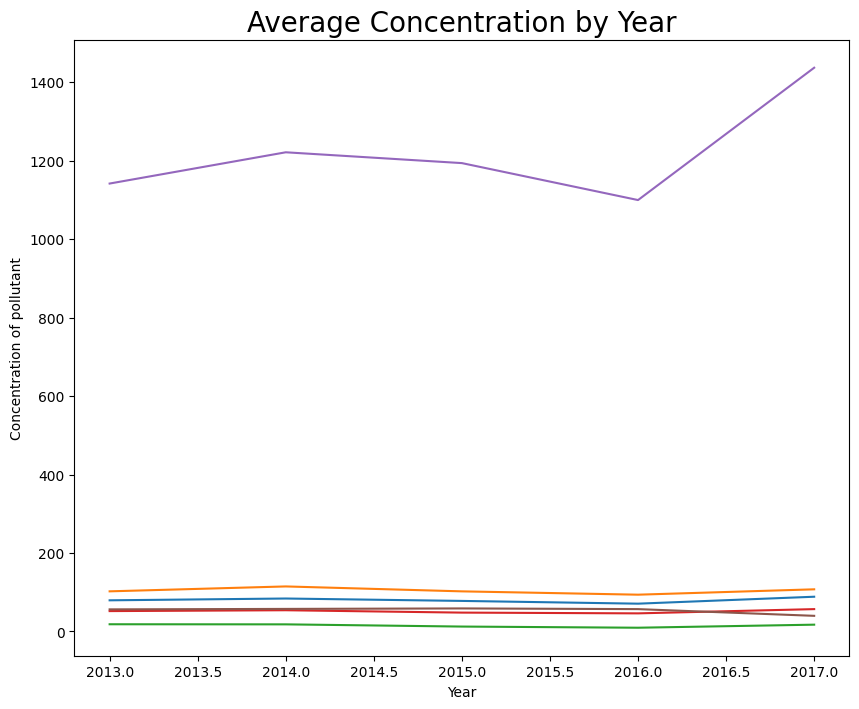

In [19]:



col1, col2, col3, = st.columns(3)

st.subheader("Overall Average per Pollutant")
with col1:
    st.write("Average Pollutan PM2.5 in Beijing")
    st.code(group_byyear["PM2.5"].mean())
    st.write("Average Pollutan NO2 in Beijing")
    st.code(group_byyear["NO2"].mean())
with col2:
    st.write("Average Pollutan PM10 in Beijing")
    st.code(group_byyear["PM10"].mean())
    st.write("Average Pollutan CO in Beijing")
    st.code(group_byyear["CO"].mean())
with col3:
    st.write("Average Pollutan SO2 in Beijing")
    st.code(group_byyear["SO2"].mean())
    st.write("Average Pollutan SO2 in Beijing")
    st.code(group_byyear["SO2"].mean())

fig, ax = plt.subplots(figsize=(10,8))
x_axis = group_byyear.index
y_axis = group_byyear.values
ax.set_title("Average Concentration by Year", fontsize=20)
ax.plot(x_axis,y_axis)
ax.set_xlabel("Year")
ax.set_ylabel("Concentration of pollutant")
st.pyplot(fig)

LALU SEKARANG AKAN DIBANDINGKAN NILAI AQI UNTUK SETIAP TAHUN

 ### **Pertanyaan 1: Bagaimana perkembangan konsentrasi polutan per tahunnya?**

In [20]:
col1, col2, col3, = st.columns(3)

st.subheader("Overall Average per Pollutant")
with col1:
    st.write("AQI PM2.5 in Beijing")
    st.code(group_byaqi["PM2.5"].mean())
    st.write("AQI NO2 in Beijing")
    st.code(group_byaqi["NO2"].mean())
with col2:
    st.write("AQI PM10 in Beijing")
    st.code(group_byaqi["PM10"].mean())
    st.write("AQI CO in Beijing")
    st.code(group_byaqi["CO"].mean())
with col3:
    st.write("AQI SO2 in Beijing")
    st.code(group_byaqi["SO2"].mean())
    st.write("Average SO2 in Beijing")
    st.code(group_byaqi["SO2"].mean())


fig, ax = plt.subplots(figsize=(10,8))
x_axis = group_byaqi.index
y_axis = group_byaqi.values
ax.set_title("Average AQI by Year", fontsize=20)
ax.plot(x_axis,y_axis)
ax.set_xlabel("Year")
ax.set_ylabel("AQI of pollutant")
st.pyplot(fig)



DeltaGenerator()

POLUTAN YANG PALING SIGNIFIKAN PERUBAHANNYA ADALAH CO (KARBON MONOKSIDA) YANG BIASANYA TERDAPAT PADA KENDARAAN BERMOTOR

 ### **Pertanyaan 2: Kota manakah dengan polusi udara terburuk?**

LALU SELANJUTKAN AKAN DITAMPILKAN PERBANDINGAN ANTAR KOTA BERDASARKAN POLUTAN:



```
GOOD                            : HIJAU
MODERATE                        : KUNING
UNHEALTHTY FOR SENSITIVE GROUP  : ORANGE
UNHEALTHTY                      : RED
VERY UNHEALTHTY                 : PURPLE
HAZARDOUS                       : GREY
```



LALU SEKARANG AKAN DIBANDINGKNA LEVEL AQI PADA SETIAP KOTA DENGAN MELIHAT MASING-MASING POLUTAN

In [22]:

st.subheader("AQI categories in each cities by pollutant")
pollutant = st.selectbox(
    "Select Pollutant",[
        "PM2.5",
        "PM10",
        "SO2",
        "NO2",
        "CO",
        "O3",

    ])
plt.style.use('dark_background')
cityLabel = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']





cleaned_data_key = [key for key in dfs_cleaned.keys() if 'after' in key][0]

avg = {}
for area, df in dfs_cleaned.items():
    average = df[pollutant].mean()
    aqi = calculateAqi(pollutant,average)
    if aqi is not None:
        avg[area] = {
            'Average': average,
            'Aqi':aqi,
            'Category':aqiCategory(aqi)
        }
    else:
        st.write("Error calculation AQI for", pollutant,' in ',area)

avg_df = pd.DataFrame.from_dict(avg, orient='index')


colors = {
    'Good': '#97F46B',
    'Moderate': '#F4E77B',
    'Unhealthy for Sensitive Groups': '#FFB266',
    'Unhealthy': '#FF7373',
    'Very Unhealthy': '#B873FF',
    'Hazardous': '#808080'
}

bar_colors = [colors[category] for category in avg_df['Category']]

fig, ax = plt.subplots()
ax.bar(x=cityLabel, height=avg_df['Aqi'], color=bar_colors)
ax.set_title("AQI {} Comparison".format(pollutant), loc="center", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Average Pollutant Concentrate")
plt.xticks(rotation=45)
plt.xticks(range(len(cityLabel)), cityLabel, ha='right')
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[category]) for category in colors.keys()]
legend_labels = colors.keys()
ax.legend(legend_handles,legend_labels,loc='lower center', bbox_to_anchor=(0.5,-0.46),ncol=len(colors))
st.pyplot(fig)


DeltaGenerator()

**KOTA DENGAN POLUSI TERBURUK ADALAH = SHUNYI**

SETELAH MELIHAT RATA RATA KONSENTRASI POLUTAN SECARA KESELURUHAN, SEKARANG AKAN DILIHAT RATA-RATA KONSENTRASI PADA SETIAP KOTA

In [21]:


st.markdown("<br/><h3 style='text-align: center;'>Average Pollutant Concentration Comparison for Every City</h4>", unsafe_allow_html=True)





col3, col4,col5 = st.columns(3)
dict_col1 = {
    'aotizhongxin' : dfs_cleaned['aotizhongxin_df_after'],
    'dongsi': dfs_cleaned['dongsi_df_after'],
    'huairou': dfs_cleaned['huairou_df_after'],
    'tiantan': dfs_cleaned['tiantan_df_after']

    }

dict_col2 = {
    'changping': dfs_cleaned['changping_df_after'],
    'guanyuan': dfs_cleaned['guanyuan_df_after'],
    'nongzhanguan': dfs_cleaned['nongzhanguan_df_after'],
    'wanliu': dfs_cleaned['wanliu_df_after']

}

dict_col3 = {
    'dingling': dfs_cleaned['dingling_df_after'],
    'gucheng': dfs_cleaned['gucheng_df_after'],
    'shunyi': dfs_cleaned['shunyi_df_after'],
    'wanshouxigong': dfs_cleaned['wanshouxigong_df_after']
}

with col3:
    for area, df in dict_col1.items():
        df_cleaned = df.agg({
            "PM2.5": "mean",
            "PM10": "mean",
            "SO2":"mean",
            "NO2":"mean",
            "CO":"mean",
            "O3":"mean",
        })

        fig, ax = plt.subplots(figsize=(6,6))
        pollutants = df_cleaned.index
        mean_concentrations = df_cleaned.values
        ax.bar(pollutants, mean_concentrations)
        ax.set_title("In {} ".format(df['station'][0]))
        ax.set_xlabel("Pollutant")
        ax.set_ylabel("Average Concentration")
        plt.xticks(rotation=45, ha='right')
        st.pyplot(fig)


with col4:
    for area, df in dict_col2.items():
        df_cleaned = df.agg({
            "PM2.5": "mean",
            "PM10": "mean",
            "SO2":"mean",
            "NO2":"mean",
            "CO":"mean",
            "O3":"mean",
        })

        fig, ax = plt.subplots(figsize=(6,6))
        pollutants = df_cleaned.index
        mean_concentrations = df_cleaned.values
        ax.bar(pollutants, mean_concentrations)
        ax.set_title("In {} ".format(df['station'][0]))
        ax.set_xlabel("Pollutant")
        ax.set_ylabel("Average Concentration")
        plt.xticks(rotation=45, ha='right')
        st.pyplot(fig)



with col5:
    for area, df in dict_col3.items():
        df_cleaned = df.agg({
            "PM2.5": "mean",
            "PM10": "mean",
            "SO2":"mean",
            "NO2":"mean",
            "CO":"mean",
            "O3":"mean",
        })

        fig, ax = plt.subplots(figsize=(6,6))
        pollutants = df_cleaned.index
        mean_concentrations = df_cleaned.values
        ax.bar(pollutants, mean_concentrations)
        ax.set_title("In {} ".format(df['station'][0]))
        ax.set_xlabel("Pollutant")
        ax.set_ylabel("Average Concentration")
        plt.xticks(rotation=45, ha='right')
        st.pyplot(fig)



KARENA ITU AKAN DIBUAT VISUALISASI

In [24]:
st.caption('Copyright (c) 2023')

DeltaGenerator()